In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
col = ["area_type","availability","location","size","society"]
for i in col:
    print(df[i].value_counts())
    print("==============================================")

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BH

In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.drop(columns=["area_type","availability","society","balcony"],inplace=True)

In [8]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
df['location'].value_counts()

location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [12]:
df['location'] = df['location'].fillna("Sarjapur  Road")

In [13]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [14]:
df['size'] = df['size'].fillna("2 BHK")

In [15]:
df['bath'] = df['bath'].fillna(df['bath'].median)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  object 
 4   price       13320 non-null  float64
dtypes: float64(1), object(4)
memory usage: 520.4+ KB


In [17]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [18]:
df[df['bhk'] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


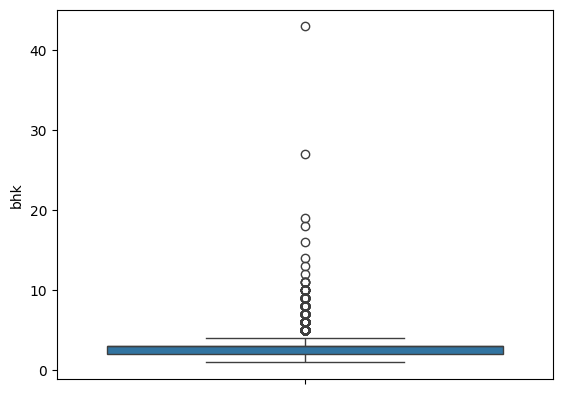

In [19]:
sns.boxplot(df['bhk'])
plt.show()

In [20]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [21]:
def convertRange(x):

    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df["total_sqft"] = df["total_sqft"].apply(convertRange)

In [23]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Price Per Square feet

In [24]:
df["price_per_sqft"] = df["price"] * 100000 / df["total_sqft"]

In [25]:
df["price_per_sqft"]

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [26]:
df.describe()

,total_sqft,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,112.565627,2.802778,7.907501e+03
std,1238.405258,148.971674,1.294496,1.064296e+05
min,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,3600.000000,43.000000,1.200000e+07


In [27]:
df['bath'] = df['bath'].astype(str).str.extract(r'(\d+\.?\d*)')[0]
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

In [28]:
df["bath"].dtype

dtype('float64')

In [29]:
df["location"].value_counts()

location
Whitefield                         540
Sarjapur  Road                     400
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [30]:
df["location"] = df["location"].apply(lambda x: x.strip())
location_count = df["location"].value_counts()

In [31]:
location_count

location
Whitefield                              541
Sarjapur  Road                          400
Electronic City                         304
Kanakpura Road                          273
Thanisandra                             237
                                       ... 
Duddanahalli                              1
Doddanakunte                              1
Jogupalya                                 1
Subhash Nagar                             1
Kengeri Satellite Town KHB Apartment      1
Name: count, Length: 1294, dtype: int64

In [32]:
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

location
Basapura                                10
Dairy Circle                            10
Nagappa Reddy Layout                    10
Naganathapura                           10
Sector 1 HSR Layout                     10
                                        ..
Duddanahalli                             1
Doddanakunte                             1
Jogupalya                                1
Subhash Nagar                            1
Kengeri Satellite Town KHB Apartment     1
Name: count, Length: 1053, dtype: int64

In [33]:
df["location"] = df["location"].apply(lambda x: 'other' if x in location_count_less_10 else x)
df["location"].value_counts()

location
other                        2885
Whitefield                    541
Sarjapur  Road                400
Electronic City               304
Kanakpura Road                273
                             ... 
Tindlu                         11
Marsur                         11
2nd Phase Judicial Layout      11
Thyagaraja Nagar               11
HAL 2nd Stage                  11
Name: count, Length: 242, dtype: int64

## outlier detection and removal

In [34]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.677853,112.565627,2.802778,7.907501e+03
std,1238.405258,1.352467,148.971674,1.294496,1.064296e+05
min,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [35]:
(df["total_sqft"] / df["bhk"]).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [36]:
df = df[((df["total_sqft"] / df["bhk"]) >= 300)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.547885,111.382401,2.650838,6303.979357
std,1261.271296,1.094606,152.077329,0.976678,4162.237981
min,300.000000,0.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [37]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)

        st = np.std(subdf.price_per_sqft)

        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index = True)
    return df_output
df = remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.460829,91.286372,2.574896,5659.062876
std,880.694214,0.995594,86.342786,0.897649,2265.774749
min,300.000000,0.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [38]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
            'mean':np.mean(bhk_df.price_per_sqft),
            'std':np.std(bhk_df.price_per_sqft),
            'count':bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [39]:
df = bhk_outlier_remover(df)

In [40]:
df.shape

(7360, 7)

In [41]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [42]:
df.drop(columns=["size","price_per_sqft"],inplace=True)

## Cleaned Data

In [43]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [44]:
df.shape

(7360, 5)

In [45]:
df.to_csv("house_price_cleaned_data.csv")

In [48]:
X = df.drop("price",axis=1)
y = df["price"]

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import pickle

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
X_train.shape, y_train.shape

((5888, 4), (5888,))

## Applying Linear Regression

In [57]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ["location"]),
                                      remainder='passthrough')

In [58]:
scaler = StandardScaler()

In [61]:
lr = LinearRegression()

In [62]:
pipe = make_pipeline(column_trans,scaler,lr)

In [63]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [65]:
y_pred_lr = pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

0.7949317342665734

## Applying all model

In [79]:
estimators = [('Linear',LinearRegression()),
              ('Lasso',Lasso()),
              ('Ridge',Ridge())]

In [80]:
for estimator in estimators:
    pipe = make_pipeline(column_trans,scaler,estimator[1])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    result = r2_score(y_test,y_pred)
    print(estimator[0],"r2_score: ",result)

Linear r2_score:  0.7949317342665734
Lasso r2_score:  0.7834721598911439
Ridge r2_score:  0.7949517889440739


In [83]:
ridge = Ridge()

In [87]:
model = make_pipeline(column_trans,scaler,ridge)

In [89]:
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [91]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.7949517889440739

In [92]:
pickle.dump(model, open("Ridge.pkl","wb"))

In [6]:
import pickle
import pandas as pd

In [3]:
model = pickle.load(open("Ridge.pkl","rb"))

In [4]:
input_data = ["1st Block Jayanagar",2850.0,4.0,4]

In [5]:
columns = ["location","total_sqft","bath","bhk"]

In [8]:
input_df = pd.DataFrame([input_data],columns=columns)

In [9]:
result = model.predict(input_df)
result

array([332.49767745])